# Gestion des processus et des ressources par un système d’exploitation

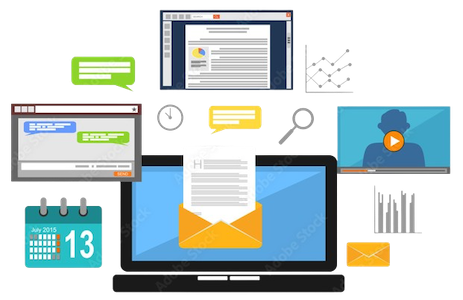

---
## Notion de processus
Un programme écrit à l'aide d'un langage de haut de niveau (on parle de "code source") est - comme nous l'avons vu en classe de première - transformé en langage machine afin de pouvoir être exécuté par un ordinateur.  

> 📌 Un processus (en anglais, _process_) est un **programme en cours d'exécution** par un ordinateur. De façon plus précise, il peut être défini par :  
>- L'ensemble des **instructions** qu'il va devoir accomplir (écrites dans le fichier exécutable)
>- Les **ressources** permettant des entrées-sorties que le programme va mobiliser (fichier, carte son, imprimante, ports réseau…)
>- L'état de la **mémoire** vive et des **registres** du processeur (voir le cours de première sur l'architecture Von Neumann)

💡 _Note : Un programme (ou logiciel ou application) peut lors de son exécution, lancer un ou plusieurs processus._


## Voir et interagir sur les processus 
Sur les différents systèmes d'exploitation, il est possible de voir les processus en cours d'exécution.  

### Sous Windows
Le **gestionnaire des tâches** affichera les programmes et le détail des processus en cours d'exécution.   
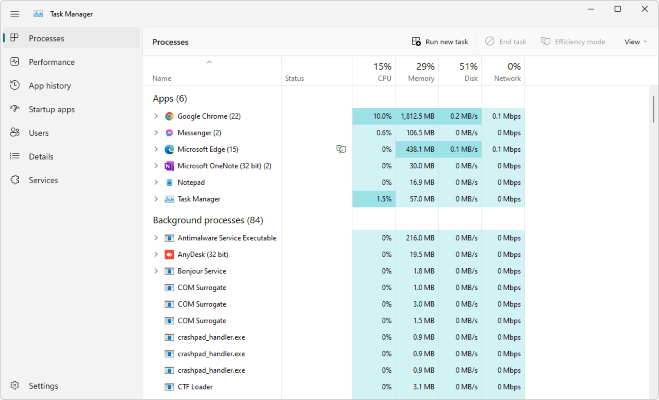  

Il existe également des logiciels qui permettent de voir demanière plus précise et détaillée les processus et également d'effectuer des actions plus poussées sur les processus comme Process Explorer.  
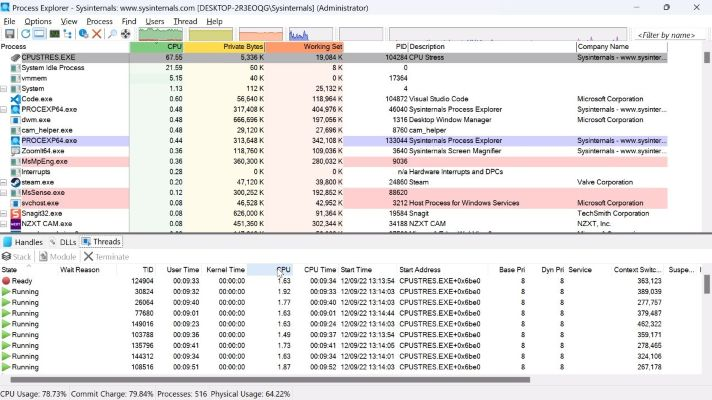  

Ici on pourra interagir sur les processus (lancement, arrêt…) avec un clic-droit sur ceux-ci ou via les menus de l'application.

### Sous Linux / Unix / macOs

**La commande `ps`**  
Dans un terminal, la commande `ps` va permettre d'afficher la liste des processus actifs. On lui passe en général les options `-ef` pour avoir tous les processus et des détails sur ceux-ci.  
Voici un exemple :  
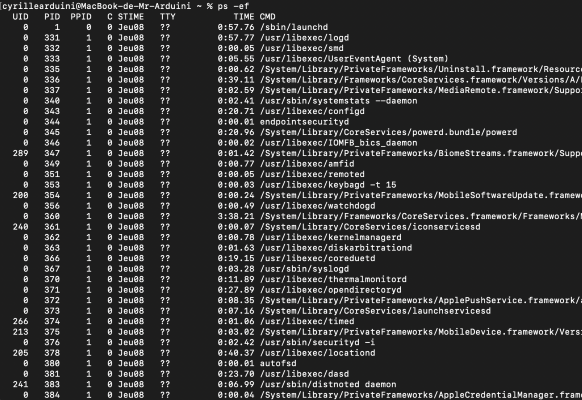

On retrouve dans ce tableau les colonnes :

- **UID** (User IDentifier) : Identifiant de l'utilisateur qui a lancé le processus.

- **PID** (Process IDentifier) : Le numéro qui identifiera de manière unique chaque processus lancé sur le système, affecté chronologiquement par le système d'exploitation.  
_Note : le processus dont le PID est 1 est le tout premier processus lancé par le système d'exploitation._

- **PPID** (Parent PID) : Certains processus vont eux-mêmes lancer plusieurs processus-fils, qui porteront le même nom. C'est ainsi qu'on peut retrouver de multiples processus s'appelant `chrome` lancés par le processus initial du navigateur.
_Note : le tout premier processus lancé par le système d'exploitation (PID=1) est le seul à ne pas avoir de parent (PPID=0)._

- **C** : Pourcentage d'utilisation du processeur par rapport au temps de vie du processus. 

- **STIME** (Start TIME): Heure de lancement du processus.

- **TTY** (TeleTYpewriter): Terminal (écran) sur lequel le processus a été exécuté.

- **TIME** : Durée d'exécution du processus.

- **CMD** (CoMmanD) : le nom de la commande qui a créé le processus.  

Vous pouvez y retrouver par ordre chronologique le nom de tous les programmes actifs. Certains sont ceux que vous avez ouverts volontairement (navigateur...) mais on y trouve surtout tous les programmes nécessaires au bon fonctionnement du système d'exploitation.  

Le dernier processus en bas de la liste sera forcément `ps -ef`, puisque vous venez de l'appeler.

**La commande `top`**  
La commande `top` permet de connaître en temps réel la liste des processus, classés par ordre décroissant de consommation de CPU. On ferme top par la combinaison de touches `Ctrl-C`. On retrouve le même type d'affichage que celui du gestionnaire des tâches Windows.  
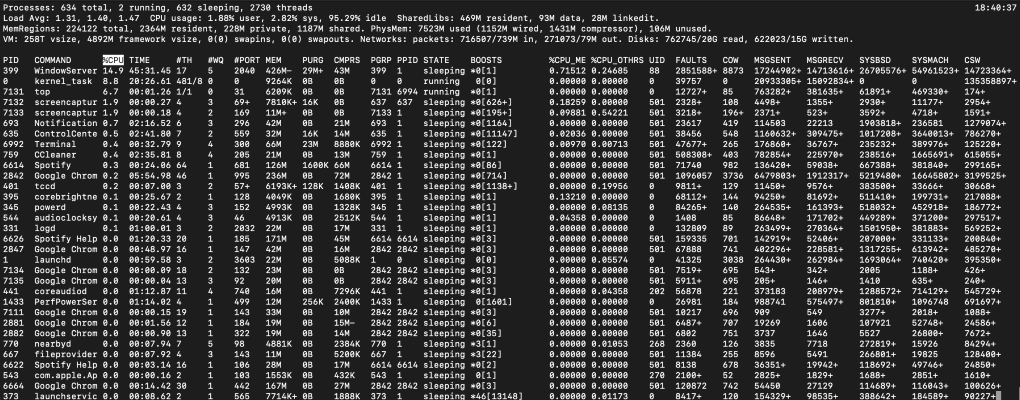

**La commande `kill`**  
La commande `kill 331` aura pour effet de demander l'arrêt du second processus de notre liste obtenue avec la commande `ps` (`/usr/libexec/logd`)   
💡 _Note : La commande envoie un signal au processus lui demandant de s'arrêter. Si celui-ci ne répond pas et que l'on veut forcer l'arrêt de celui-ci, on peut utiliser l'option bien connue `-9`_  
`kill -9 331` aura pour effet de forcer l'arrêt du processus.


---
## L'ordonnancement des processus
Tous les systèmes d'exploitation "modernes" (Linux, Windows, macOS, Android, iOS...) sont capables de gérer l'exécution de plusieurs processus en même temps (multitâche). Pour être précis, cela n'est pas véritablement "en même temps", mais plutôt un "chacun son tour" (On parle de **tourniquet** ou de _Round Robin_).  
  
_Note : Dans le cas très fréquent maintenant d'un processeur multi-coeurs, le problème reste identique. Certes, sur 4 coeurs, 4 processus pourront être traités simultanément (une réelle simultanéité) mais il reste toujours beaucoup plus de processus à traiter que de coeurs dans le processeur donc un ordonnancement est donc toujours nécessaire._
  

>📌 Pour gérer ce "chacun son tour", les systèmes d'exploitation attribuent des **états** au processus.
>- **Prêt** : Il attend qu'arrive le moment de son exécution.
>- **Élu** : Il est en cours d'exécution par le processeur.
>- **Bloqué** : Pendant son exécution (état Élu), le processus réclame une ressource qui n'est pas immédiatement disponible (par exemple un fichier sur le disque dur). Son exécution s'interrompt. Lorsque la ressource sera disponible, le processus repassera par l'état Prêt et attendra à nouveau son tour.

Un processus est toujours créé dans l'état prêt.  
Le passage de l'état prêt vers l'état élu constitue l'opération d'**élection**.  
Le passage de l'état élu vers l'état bloqué est l'opération de **blocage**.  
Le passage de l'état bloqué vers l'état élu est l'opération de **déblocage**.  
Pour se terminer, un processus doit obligatoirement se trouver dans l'état élu.  

On peut résumer tout cela avec le diagramme suivant :

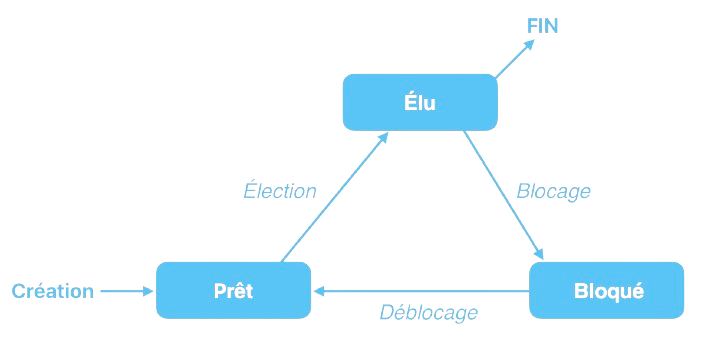

Le système d'exploitation est le "chef d'orchestre" qui attribue aux processus leur état "élu", "bloqué" ou "prêt". On dit que le système gère l'ordonnancement des processus (tel processus sera prioritaire sur tel autre).  

Un processus qui utilise une ressource doit la "libérer" une fois qu'il a fini de l'utiliser afin de la rendre disponible pour les autres processus. Pour libérer une ressource, un processus doit obligatoirement être dans un état "élu".  

Généralement, lorsqu'un processus est élu, il l'est pour un temps bien défini au bout duquel il evra rendre le processeur et rejoindre la liste des processus prêts à être exécutés.

---
## Interblocage

### Accès aux ressources
Pendant son exécution, un processus peut avoir besoin d'accéder à une ressource déjà occupée par un autre processus (un fichier déjà ouvert par exemple) ou être en attente d'une entrée-utilisateur (un `input()` dans un code Python par exemple). Dans ce cas-là, le processeur va passer ce processus à l'état **Bloqué** pour pouvoir ainsi se consacrer à un autre processus.  
Une fois la ressource libérée, le porcessus sera débloqué et va repasser à l'état Prêt et rejoindre la file d'attente des processus avant d'être à nouveau Élu et donc exécuté.  

Ces ressources (l'accès en écriture à un fichier, à un registre de la mémoire…) ne peuvent pas être données à deux processus à la fois. Des processus souhaitant accéder à cette ressource sont donc en **concurrence** sur cette ressource.  


### Exemple
Considérons 2 processus $A$ et $B$, et deux ressources $R$ et $S$. L'action des processus $A$ et $B$ est décrite ci-dessous :

| Processus A             | Processus B            |
| :----------             | :----------            | 
| étape A1 : demande $R$  |étape B1 : demande $S$  | 
| étape A2 : demande $S$  |étape B2 : demande $R$  | 
| étape A3 : libère $S$   |étape B3 : libère $R$   | 
| étape A4 : libère $R$   |étape B4 : libère $S$   | 



Déroulement des processus A et B :

- A et B sont créés et passent à l'état Prêt.
- L'ordonnanceur déclare Élu le processus A.
- L'étape A1 de A est réalisée => la ressource R est donc affectée à A.
- L'ordonnanceur déclare maintenant Élu le processus B. A est donc passé à Prêt en attendant que son tour revienne.
- L'étape B1 de B est réalisée => la ressource S est donc affectée à B.
- L'ordonnanceur déclare à nouveau Élu le processus A. B est donc passé à Prêt en attendant que son tour revienne.
- L'étape A2 de A est donc enclenchée => **problème** : il faut accèder à la ressource S, qui n'est pas disponible. L'ordonnanceur va donc passer A à Bloqué et va revenir au processus B qui redevient Élu.
- L'étape B2 de B est donc enclenchée => **problème** : il faut accèder à la ressource R, qui n'est pas disponible. L'ordonnanceur va donc passer B à Bloqué.
- Les deux processus A et B sont donc dans l'état Bloqué, chacun en attente de la libération d'une ressource bloquée par l'autre : ils se bloquent mutuellement.

> 📌 Cette situation (critique) est appelée **interblocage** ou _deadlock_


### Quelques exemples de _deadlocks_ dans la vie courante

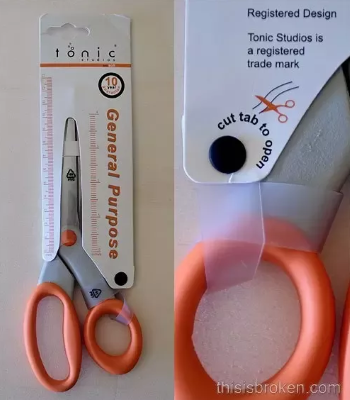  
_<center>Ici il faut une paire de ciseaux pour ouvrir l'emballage des ciseaux</center>_  
  

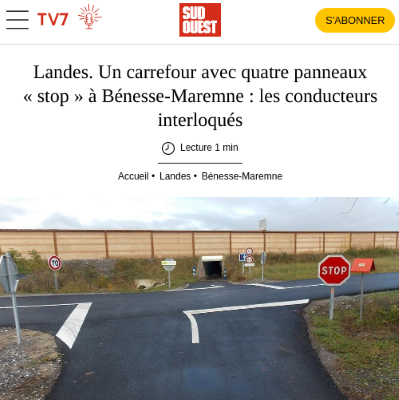  
_<center>L'exemple classique, si 4 automobiles arrivent simultanément, qui passe en premier ?</center>_  
  

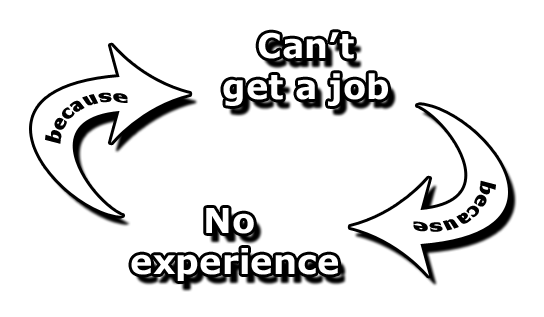  
_<center>Le cycle infernal</center>_  
  

### Comment s'en prémunir ? (_hors programme_)
Il existe trois stratégies pour éviter les interblocages :
- La prévention : on oblige le processus à déclarer à l'avance la liste de toutes les ressources auxquelles il va accéder.
- L'évitement : on fait en sorte qu'à chaque étape il reste une possibilité d'attribution de ressources qui évite le deadlock.
- La détection/résolution : on laisse la situation arriver jusqu'au deadlock, puis un algorithme de résolution détermine quelle ressource libérer ou quel processus arrêter pour mettre fin à l'interblocage.

Une autre manière d'éviter les interblocages est que les processus utilisent les ressources toujours dans le même ordre.
